In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
dna = pd.read_csv("data.csv",index_col=[0])
labels = pd.read_csv("labels.csv",index_col=[0])

In [3]:
dna.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
labels.head()

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA


In [5]:
dna_merged = pd.concat([dna, labels], axis=1)

In [6]:
dna_merged.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [7]:
data = dna_merged.set_index('Class').sort_index()

In [8]:
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.0,3.801873,5.025591,6.404150,9.564754,0.0,9.997688,1.025241,0.0,0.0,...,5.919628,8.507347,9.849333,8.184360,9.796564,11.607552,10.456272,9.949412,5.980037,0.000000
BRCA,0.0,3.277330,2.629846,6.000487,9.627027,0.0,8.375748,1.029559,0.0,0.0,...,6.152192,9.015499,10.244994,5.172335,9.788066,11.582057,11.098776,9.909158,5.494595,0.000000
BRCA,0.0,1.149975,0.462576,5.861427,10.092440,0.0,5.445833,1.045932,0.0,0.0,...,6.494526,9.549727,10.037602,6.636375,9.459339,10.109922,10.442394,9.574616,3.541862,0.000000
BRCA,0.0,4.538159,3.955722,6.259862,9.103243,0.0,6.918327,1.162726,0.0,0.0,...,7.102994,9.813018,10.629311,7.128757,10.409104,11.195225,11.169593,10.513451,6.729131,0.270828
BRCA,0.0,2.599770,2.562792,7.365491,10.462155,0.0,7.922370,0.000000,0.0,0.0,...,5.036873,8.267555,9.630254,5.531385,9.241642,11.459872,10.045882,9.091528,9.356654,0.000000


In [9]:
data.shape

(801, 20531)

<Axes: ylabel='Class'>

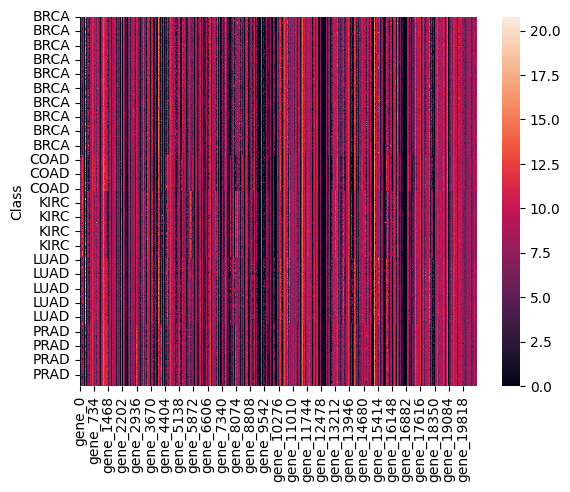

In [10]:
import seaborn as sns
sns.heatmap(data)

c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


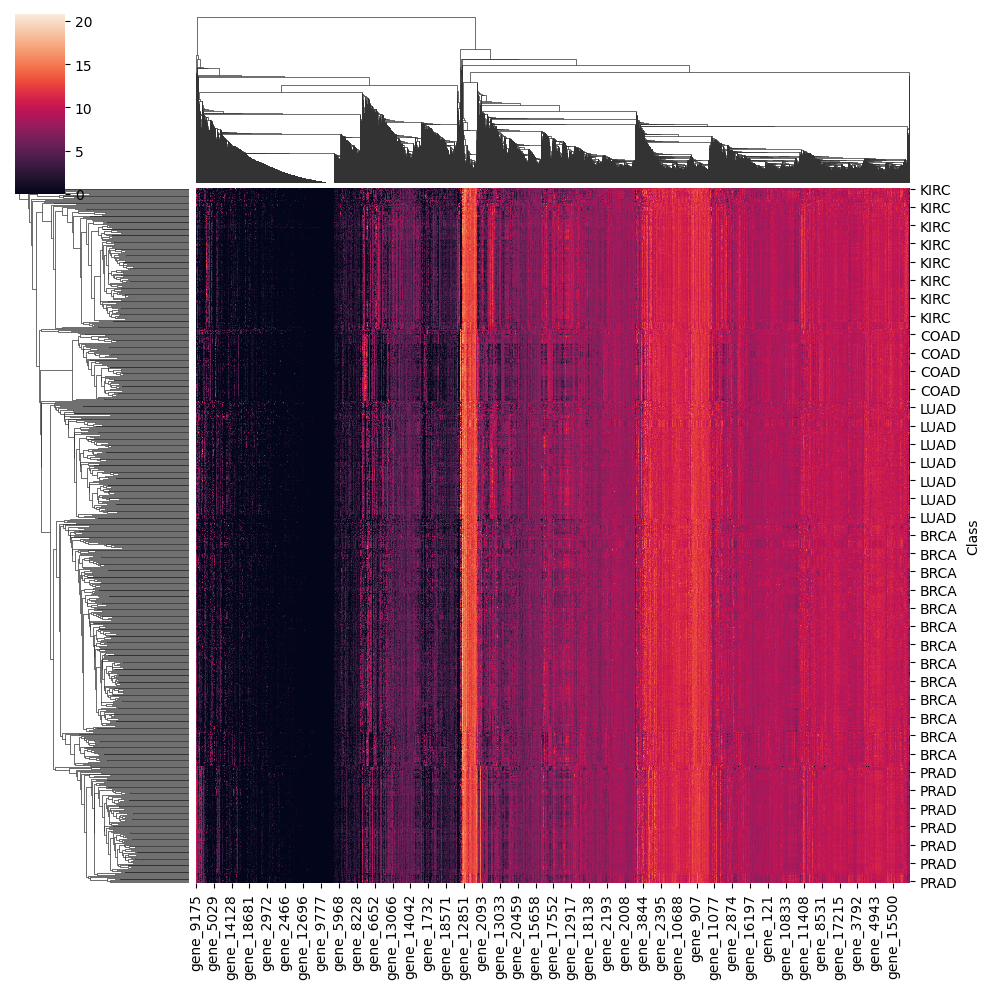

In [11]:
sns.clustermap(data)

In [12]:
data.index.value_counts()

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

In [13]:
data.isnull().values.any()

False

## Visualization and dimensionality reduction

In [14]:
features = list(data.columns.values)
len(features)

20531

In [15]:
x = dna[features].reset_index(drop=True)
y = labels

In [16]:
x.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [17]:
y = y.reset_index(drop=True)
y.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


**rescale data**

In [18]:
x_std_scale = StandardScaler().fit_transform(x)

In [19]:
x_std_scale

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [20]:
n_classes = len(y.groupby('Class'))
n_classes

5

**PCA : Principal Component Analysis**

In [21]:
pca = PCA(n_components=2)
principal_component = pca.fit_transform(x)

In [22]:
principal_df = pd.DataFrame(data=principal_component, columns=['Principal Component 1', 'Principal Component 2'])

In [23]:
principal_df.head()

,Principal Component 1,Principal Component 2
0,-62.755415,-94.071973
1,-2.432896,90.585842
2,-71.266853,-8.064608
3,-84.770785,-73.244566
4,-69.560171,-9.612940


In [24]:
concat_df = pd.concat([principal_df, y['Class']], axis=1)

In [25]:
concat_df.head()

,Principal Component 1,Principal Component 2,Class
0,-62.755415,-94.071973,PRAD
1,-2.432896,90.585842,LUAD
2,-71.266853,-8.064608,PRAD
3,-84.770785,-73.244566,PRAD
4,-69.560171,-9.612940,BRCA


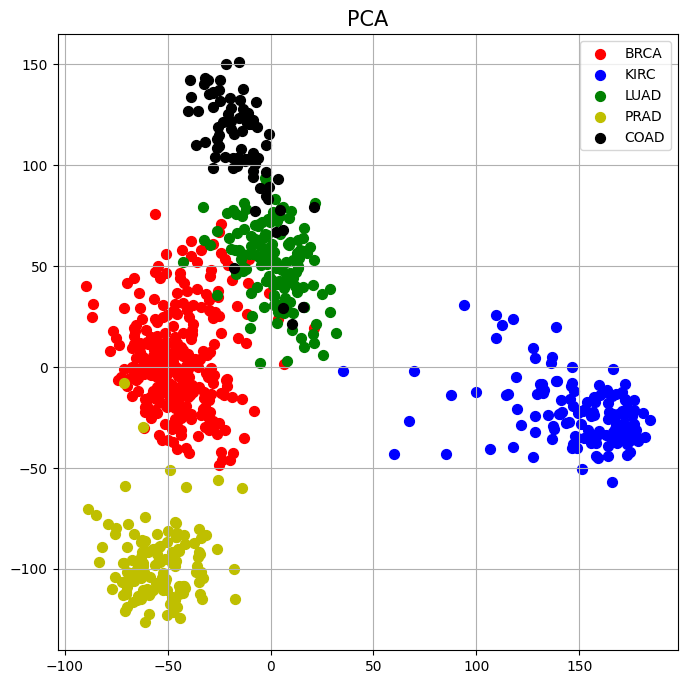

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('PCA', fontsize=15)
labels_list = ['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
colors = ['r', 'b', 'g', 'y', 'black']

for lab, color in zip(labels_list, colors):
    indices = concat_df['Class'] == lab
    ax.scatter(concat_df.loc[indices, 'Principal Component 1'],
              concat_df.loc[indices, 'Principal Component 2'], 
              c = color,
              s = 50)
    ax.legend(labels_list)
    ax.grid()

**t-sne : t-distributed stochastic neighbor embedding**

In [27]:
tsne = TSNE(n_components=2, random_state=0)
tsne_rnaexp = tsne.fit_transform(x)

In [28]:
tsne_df = pd.DataFrame(data=tsne_rnaexp, columns=['tsne 1', 'tsne 2'])

In [29]:
tsne_concat_df = pd.concat([tsne_df, y['Class']], axis=1)

In [30]:
tsne_concat_df.head()

,tsne 1,tsne 2,Class
0,-0.071367,-39.328201,PRAD
1,12.881719,18.755415,LUAD
2,-6.402750,-35.346748,PRAD
3,-5.598386,-35.113819,PRAD
4,-17.778538,0.074788,BRCA


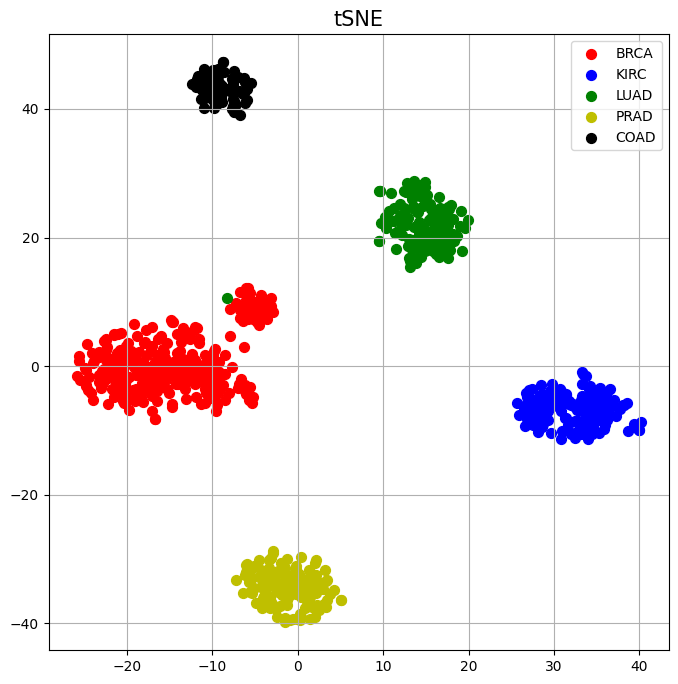

In [31]:
fig_2 = plt.figure(figsize=(8,8))
ax_2 = fig_2.add_subplot(1,1,1)
ax_2.set_title('tSNE', fontsize=15)
labels_list_2 = ['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
colors_2 = ['r', 'b', 'g', 'y', 'black']

for lab, color in zip(labels_list_2, colors_2):
    indices = tsne_concat_df['Class'] == lab
    ax_2.scatter(tsne_concat_df.loc[indices, 'tsne 1'],
              tsne_concat_df.loc[indices, 'tsne 2'], 
              c = color,
              s = 50)
    ax_2.legend(labels_list_2)
    ax_2.grid()

**ICA : Independent Component Analysis**

In [32]:
from sklearn.decomposition import FastICA

# train the model
ica = FastICA(n_components=2)
ica_ = ica.fit_transform(x)  # estimated independent sources

# compare the estimated sources with the true sources
#print(np.allclose(S, S_))

c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [33]:
ica_df = pd.DataFrame(ica_,columns=['feature1','feature2'])
ica_df

,feature1,feature2
0,0.812081,1.535213
1,0.048454,-1.469100
2,0.940010,0.141274
3,1.106663,1.200585
4,0.917185,0.166141
...,...,...
796,0.799996,0.370324
797,0.200710,-0.863991
798,-0.134643,-0.351450
799,0.710771,1.506877


In [34]:
ica_concat_df = pd.concat([ica_df, y['Class']], axis=1)
ica_concat_df

,feature1,feature2,Class
0,0.812081,1.535213,PRAD
1,0.048454,-1.469100,LUAD
2,0.940010,0.141274,PRAD
3,1.106663,1.200585,PRAD
4,0.917185,0.166141,BRCA
...,...,...,...
796,0.799996,0.370324,BRCA
797,0.200710,-0.863991,LUAD
798,-0.134643,-0.351450,COAD
799,0.710771,1.506877,PRAD


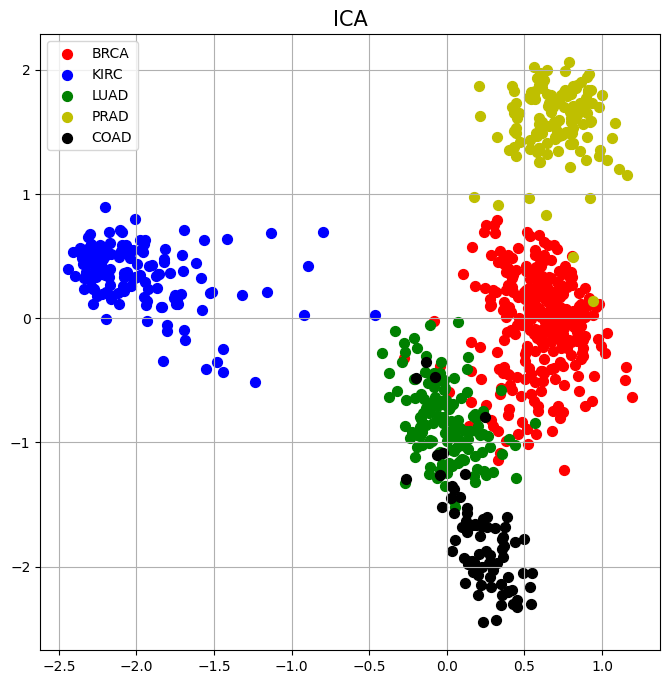

In [35]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('ICA', fontsize=15)
labels_list_2 = ['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
colors_2 = ['r', 'b', 'g', 'y', 'black']

for lab, color in zip(labels_list_2, colors_2):
    indices = ica_concat_df['Class'] == lab
    ax.scatter(ica_concat_df.loc[indices, 'feature1'],
              ica_concat_df.loc[indices, 'feature2'], 
              c = color,
              s = 50)
    ax.legend(labels_list_2)
    ax.grid()

**feature importance with Decision Trees**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

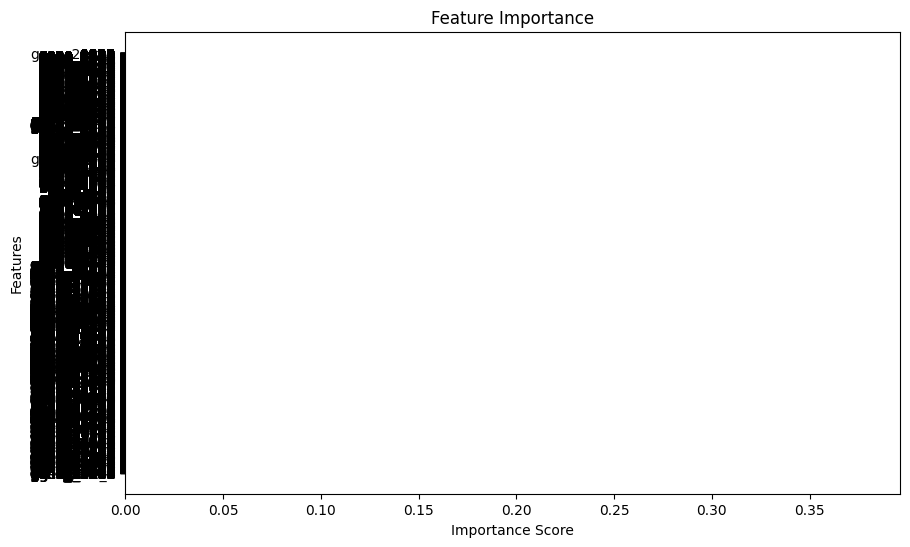

          Feature  Importance
18746  gene_18746    0.377508
12983  gene_12983    0.232066
8014    gene_8014    0.207301
3523    gene_3523    0.158986
5186    gene_5186    0.015935
...           ...         ...
6844    gene_6844    0.000000
6843    gene_6843    0.000000
6842    gene_6842    0.000000
6841    gene_6841    0.000000
20530  gene_20530    0.000000

[20531 rows x 2 columns]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Step 5: Get Feature Importance
feature_importance = clf.feature_importances_

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Display feature importance scores
print(feature_importance_df)

In [38]:
feature_importance_df[feature_importance_df['Importance']>0.001]

,Feature,Importance
18746,gene_18746,0.377508
12983,gene_12983,0.232066
8014,gene_8014,0.207301
3523,gene_3523,0.158986
5186,gene_5186,0.015935
1265,gene_1265,0.004110
13267,gene_13267,0.004094


In [6]:
# prompt: Then i have the genes of 20531 genes and the Class of the cancer in a combined_df data frame. Then i want to know what genes(features) are highly related to the gene class(label). I want to know the score as well. I have continuous values for features and categorical values for labels. then dont use chi

from sklearn.feature_selection import f_classif

# Separate features and labels
features = dna_merged.drop('Class', axis=1)
labels = dna_merged['Class']

# Perform ANOVA F-test to select features with high correlation to the label
f_values, p_values = f_classif(features, labels)

# Sort features by their F-values in descending order
significant_features = sorted(zip(features.columns, f_values, p_values), key=lambda x: x[1], reverse=True)

# Print the top 10 most significant features
print('Top 100 most significant features:')
for feature, f_value, p_value in significant_features[:100]:
    print(f'{feature}: F-value={f_value:.2f}, p-value={p_value:.4f}')

Top 100 most significant features:
gene_220: F-value=3441.77, p-value=0.0000
gene_219: F-value=3391.74, p-value=0.0000
gene_13818: F-value=2438.58, p-value=0.0000
gene_450: F-value=2215.24, p-value=0.0000
gene_3737: F-value=2046.83, p-value=0.0000
gene_3921: F-value=1989.21, p-value=0.0000
gene_6733: F-value=1984.63, p-value=0.0000
gene_3439: F-value=1972.26, p-value=0.0000
gene_1858: F-value=1851.31, p-value=0.0000
gene_1510: F-value=1735.74, p-value=0.0000
gene_203: F-value=1722.20, p-value=0.0000
gene_3523: F-value=1718.63, p-value=0.0000
gene_3461: F-value=1687.67, p-value=0.0000
gene_2037: F-value=1544.19, p-value=0.0000
gene_2288: F-value=1310.31, p-value=0.0000
gene_18: F-value=1149.04, p-value=0.0000
gene_11059: F-value=1131.41, p-value=0.0000
gene_4442: F-value=1083.80, p-value=0.0000
gene_3524: F-value=1053.74, p-value=0.0000
gene_3970: F-value=1029.28, p-value=0.0000
gene_10284: F-value=1009.95, p-value=0.0000
gene_2129: F-value=953.72, p-value=0.0000
gene_628: F-value=937.7

c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [    5    23  4370  4808  4809  4814  4816  4817  4831  5288  7661  7662
  7663  7664  7665  8121  9304  9306  9314  9316  9320  9452 10121 11958
 13991 14158 14159 14161 15138 15140 15141 15446 16566 16568 16569 16571
 16575 16578 16579 16604 16634 16637 16677 16697 16698 16699 16700 16701
 16702 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713 16714
 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725 16726
 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737 16738
 16739 16740 16741 16742 16743 16744 16745 16746 16748 16749 16750 16751
 16752 16753 16754 16756 16757 16758 16759 16760 16761 16762 16763 16764
 16765 16766 16767 16768 16769 16770 16771 16772 16774 16775 16776 16777
 16778 16779 16780 16781 16782 16783 16785 16787 16788 16789 16790 16791
 16792 16794 16795 16796 16798 16799 16800 16801 16802 16803 1680

## Training With Classification Models

In [39]:
x['gene_10']

0      0.591871
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
796    0.000000
797    0.000000
798    7.448149
799    1.578746
800    0.748375
Name: gene_10, Length: 801, dtype: float64

In [40]:
y_labels = y
y_labels

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA
...,...
796,BRCA
797,LUAD
798,COAD
799,PRAD


In [41]:
y, cancer_types = pd.factorize(y_labels['Class'],sort=True)

In [43]:
cancer_types

Index(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='object')

In [44]:
x_scaled_data = StandardScaler().fit_transform(x)

In [45]:
x_scaled_data.shape

(801, 20531)

# Adaboost

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier()

# Train the classifier
adaboost_clf.fit(X_train, y_train)

# Predict labels for the test set
y_pred = adaboost_clf.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8012422360248447
[[58  0  3  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  2 27  0  0]
 [ 0  0  0  0 29]]
[0.95081967 1.         1.         0.         1.        ]


c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
0,1.000000,0.950820,0.974790,61.000000
1,0.894737,1.000000,0.944444,17.000000
2,0.454545,1.000000,0.625000,25.000000
3,0.000000,0.000000,0.000000,29.000000
4,1.000000,1.000000,1.000000,29.000000
accuracy,0.801242,0.801242,0.801242,0.801242
macro avg,0.669856,0.790164,0.708847,161.000000
weighted avg,0.724063,0.801242,0.746228,161.000000


scaled data

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier()

# Train the classifier
adaboost_clf.fit(X_train, y_train)

# Predict labels for the test set
y_pred = adaboost_clf.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8012422360248447
[[58  0  3  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  2 27  0  0]
 [ 0  0  0  0 29]]
[0.95081967 1.         1.         0.         1.        ]


c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
0,1.000000,0.950820,0.974790,61.000000
1,0.894737,1.000000,0.944444,17.000000
2,0.454545,1.000000,0.625000,25.000000
3,0.000000,0.000000,0.000000,29.000000
4,1.000000,1.000000,1.000000,29.000000
accuracy,0.801242,0.801242,0.801242,0.801242
macro avg,0.669856,0.790164,0.708847,161.000000
weighted avg,0.724063,0.801242,0.746228,161.000000


tsne

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tsne_df, y, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier()

# Train the classifier
adaboost_clf.fit(X_train, y_train)

# Predict labels for the test set
y_pred = adaboost_clf.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 0.9875776397515528
[[59  0  0  2  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]
[0.96721311 1.         1.         1.         1.        ]


c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,precision,recall,f1-score,support
0,1.000000,0.967213,0.983333,61.000000
1,1.000000,1.000000,1.000000,17.000000
2,1.000000,1.000000,1.000000,25.000000
3,0.935484,1.000000,0.966667,29.000000
4,1.000000,1.000000,1.000000,29.000000
accuracy,0.987578,0.987578,0.987578,0.987578
macro avg,0.987097,0.993443,0.990000,161.000000
weighted avg,0.988379,0.987578,0.987681,161.000000


pca

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, y, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier()

# Train the classifier
adaboost_clf.fit(X_train, y_train)

# Predict labels for the test set
y_pred = adaboost_clf.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7080745341614907
[[61  0  0  0  0]
 [17  0  0  0  0]
 [ 0  0 25  0  0]
 [29  0  0  0  0]
 [ 1  0  0  0 28]]
[1.         0.         1.         0.         0.96551724]


c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\miniforge3\envs\dm-tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
0,0.564815,1.000000,0.721893,61.000000
1,0.000000,0.000000,0.000000,17.000000
2,1.000000,1.000000,1.000000,25.000000
3,0.000000,0.000000,0.000000,29.000000
4,1.000000,0.965517,0.982456,29.000000
accuracy,0.708075,0.708075,0.708075,0.708075
macro avg,0.512963,0.593103,0.540870,161.000000
weighted avg,0.549402,0.708075,0.605756,161.000000


# DecisionTreeClassifier

In [ ]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 0.9937888198757764
[[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 1  0  0  0 28]]
[1.         1.         1.         1.         0.96551724]


,precision,recall,f1-score,support
0,0.983871,1.000000,0.991870,61.000000
1,1.000000,1.000000,1.000000,17.000000
2,1.000000,1.000000,1.000000,25.000000
3,1.000000,1.000000,1.000000,29.000000
4,1.000000,0.965517,0.982456,29.000000
accuracy,0.993789,0.993789,0.993789,0.993789
macro avg,0.996774,0.993103,0.994865,161.000000
weighted avg,0.993889,0.993789,0.993760,161.000000


scaled data

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 0.9751552795031055
[[58  0  0  3  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 1  0  0 28  0]
 [ 0  0  0  0 29]]
[0.95081967 1.         1.         0.96551724 1.        ]


,precision,recall,f1-score,support
0,0.983051,0.950820,0.966667,61.000000
1,1.000000,1.000000,1.000000,17.000000
2,1.000000,1.000000,1.000000,25.000000
3,0.903226,0.965517,0.933333,29.000000
4,1.000000,1.000000,1.000000,29.000000
accuracy,0.975155,0.975155,0.975155,0.975155
macro avg,0.977255,0.983267,0.980000,161.000000
weighted avg,0.976147,0.975155,0.975362,161.000000


tsne dataset

In [ ]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tsne_df, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 1.0
[[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]
[1. 1. 1. 1. 1.]


,precision,recall,f1-score,support
0,1.0,1.0,1.0,61.0
1,1.0,1.0,1.0,17.0
2,1.0,1.0,1.0,25.0
3,1.0,1.0,1.0,29.0
4,1.0,1.0,1.0,29.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,161.0
weighted avg,1.0,1.0,1.0,161.0


pca

In [ ]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 0.9192546583850931
[[56  0  0  5  0]
 [ 0 14  0  3  0]
 [ 0  0 25  0  0]
 [ 1  3  0 25  0]
 [ 1  0  0  0 28]]
[0.91803279 0.82352941 1.         0.86206897 0.96551724]


,precision,recall,f1-score,support
0,0.965517,0.918033,0.941176,61.000000
1,0.823529,0.823529,0.823529,17.000000
2,1.000000,1.000000,1.000000,25.000000
3,0.757576,0.862069,0.806452,29.000000
4,1.000000,0.965517,0.982456,29.000000
accuracy,0.919255,0.919255,0.919255,0.919255
macro avg,0.909324,0.913830,0.910723,161.000000
weighted avg,0.924635,0.919255,0.921056,161.000000


# Linear Discriminant Analysis (LDA)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True)

# Initialize the LDA classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier
lda.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = lda.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 0.9937888198757764
[[61  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 23  0  0]
 [ 1  0  0 24  0]
 [ 0  0  0  0 32]]
[1.   1.   1.   0.96 1.  ]


,precision,recall,f1-score,support
0,0.983871,1.000000,0.991870,61.000000
1,1.000000,1.000000,1.000000,20.000000
2,1.000000,1.000000,1.000000,23.000000
3,1.000000,0.960000,0.979592,25.000000
4,1.000000,1.000000,1.000000,32.000000
accuracy,0.993789,0.993789,0.993789,0.993789
macro avg,0.996774,0.992000,0.994292,161.000000
weighted avg,0.993889,0.993789,0.993751,161.000000


scaled dataset

In [93]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y, train_size=0.8, shuffle=True)

# Initialize the LDA classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier
lda.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = lda.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 0.7329192546583851
[[60  1  0  2  3]
 [ 0 16  0  0  0]
 [ 0  0 27  0  1]
 [10 22  1  0  1]
 [ 0  1  1  0 15]]
[0.90909091 1.         0.96428571 0.         0.88235294]


,precision,recall,f1-score,support
0,0.857143,0.909091,0.882353,66.000000
1,0.400000,1.000000,0.571429,16.000000
2,0.931034,0.964286,0.947368,28.000000
3,0.000000,0.000000,0.000000,34.000000
4,0.750000,0.882353,0.810811,17.000000
accuracy,0.732919,0.732919,0.732919,0.732919
macro avg,0.587635,0.751146,0.642392,161.000000
weighted avg,0.632238,0.732919,0.668871,161.000000


for t-sne data

In [94]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tsne_df, y, test_size=0.2, shuffle=True)

# Initialize the LDA classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier
lda.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = lda.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 1.0
[[54  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0 30  0]
 [ 0  0  0  0 33]]
[1. 1. 1. 1. 1.]


,precision,recall,f1-score,support
0,1.0,1.0,1.0,54.0
1,1.0,1.0,1.0,20.0
2,1.0,1.0,1.0,24.0
3,1.0,1.0,1.0,30.0
4,1.0,1.0,1.0,33.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,161.0
weighted avg,1.0,1.0,1.0,161.0


for pca data

In [95]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, y, test_size=0.2, shuffle=True)

# Initialize the LDA classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier
lda.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = lda.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 0.9440993788819876
[[52  0  0  5  0]
 [ 0 11  0  1  0]
 [ 0  0 29  1  0]
 [ 2  0  0 31  0]
 [ 0  0  0  0 29]]
[0.9122807  0.91666667 0.96666667 0.93939394 1.        ]


,precision,recall,f1-score,support
0,0.962963,0.912281,0.936937,57.000000
1,1.000000,0.916667,0.956522,12.000000
2,1.000000,0.966667,0.983051,30.000000
3,0.815789,0.939394,0.873239,33.000000
4,1.000000,1.000000,1.000000,29.000000
accuracy,0.944099,0.944099,0.944099,0.944099
macro avg,0.955750,0.947002,0.949950,161.000000
weighted avg,0.949130,0.944099,0.945293,161.000000


# k-NN classifier

In [96]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

# Create k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the classifier
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 1.0
[[56  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0 36  0  0]
 [ 0  0  0 32  0]
 [ 0  0  0  0 23]]
[1. 1. 1. 1. 1.]


,precision,recall,f1-score,support
0,1.0,1.0,1.0,56.0
1,1.0,1.0,1.0,14.0
2,1.0,1.0,1.0,36.0
3,1.0,1.0,1.0,32.0
4,1.0,1.0,1.0,23.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,161.0
weighted avg,1.0,1.0,1.0,161.0


for scaled data

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y, test_size=0.2, shuffle=True)

# Create k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the classifier
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 0.9937888198757764
[[60  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0 27  0  0]
 [ 1  0  0 29  0]
 [ 0  0  0  0 30]]
[1.         1.         1.         0.96666667 1.        ]


,precision,recall,f1-score,support
0,0.983607,1.000000,0.991736,60.000000
1,1.000000,1.000000,1.000000,14.000000
2,1.000000,1.000000,1.000000,27.000000
3,1.000000,0.966667,0.983051,30.000000
4,1.000000,1.000000,1.000000,30.000000
accuracy,0.993789,0.993789,0.993789,0.993789
macro avg,0.996721,0.993333,0.994957,161.000000
weighted avg,0.993891,0.993789,0.993762,161.000000


for the t-sne dataset

In [98]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tsne_df, y, test_size=0.2, shuffle=True)

# Create k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the classifier
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 1.0
[[54  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 35  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 30]]
[1. 1. 1. 1. 1.]


,precision,recall,f1-score,support
0,1.0,1.0,1.0,54.0
1,1.0,1.0,1.0,16.0
2,1.0,1.0,1.0,35.0
3,1.0,1.0,1.0,26.0
4,1.0,1.0,1.0,30.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,161.0
weighted avg,1.0,1.0,1.0,161.0


pca

In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, y, test_size=0.2, shuffle=True)

# Create k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the classifier
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 0.9751552795031055
[[57  0  0  2  0]
 [ 0 20  0  0  0]
 [ 0  0 34  0  0]
 [ 1  1  0 25  0]
 [ 0  0  0  0 21]]
[0.96610169 1.         1.         0.92592593 1.        ]


,precision,recall,f1-score,support
0,0.982759,0.966102,0.974359,59.000000
1,0.952381,1.000000,0.975610,20.000000
2,1.000000,1.000000,1.000000,34.000000
3,0.925926,0.925926,0.925926,27.000000
4,1.000000,1.000000,1.000000,21.000000
accuracy,0.975155,0.975155,0.975155,0.975155
macro avg,0.972213,0.978406,0.975179,161.000000
weighted avg,0.975344,0.975155,0.975151,161.000000


# Logistic Regression

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # You can adjust max_iter as needed

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 1.0
[[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]
[1. 1. 1. 1. 1.]


,precision,recall,f1-score,support
0,1.0,1.0,1.0,61.0
1,1.0,1.0,1.0,17.0
2,1.0,1.0,1.0,25.0
3,1.0,1.0,1.0,29.0
4,1.0,1.0,1.0,29.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,161.0
weighted avg,1.0,1.0,1.0,161.0


scaled data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # You can adjust max_iter as needed

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 1.0
[[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]
[1. 1. 1. 1. 1.]


,precision,recall,f1-score,support
0,1.0,1.0,1.0,61.0
1,1.0,1.0,1.0,17.0
2,1.0,1.0,1.0,25.0
3,1.0,1.0,1.0,29.0
4,1.0,1.0,1.0,29.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,161.0
weighted avg,1.0,1.0,1.0,161.0


tsne

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tsne_df, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # You can adjust max_iter as needed

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 1.0
[[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]
[1. 1. 1. 1. 1.]


,precision,recall,f1-score,support
0,1.0,1.0,1.0,61.0
1,1.0,1.0,1.0,17.0
2,1.0,1.0,1.0,25.0
3,1.0,1.0,1.0,29.0
4,1.0,1.0,1.0,29.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,161.0
weighted avg,1.0,1.0,1.0,161.0


pca

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_df, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # You can adjust max_iter as needed

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
report =classification_report(y_test, y_pred,output_dict=True)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuaracy_labels =conf_matrix.diagonal()/conf_matrix.sum(axis=1)
print(accuaracy_labels)

df = pd.DataFrame(report).transpose()
display(df)

Accuracy: 0.9440993788819876
[[55  0  0  6  0]
 [ 0 15  0  2  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 1  0  0  0 28]]
[0.90163934 0.88235294 1.         1.         0.96551724]


,precision,recall,f1-score,support
0,0.982143,0.901639,0.940171,61.000000
1,1.000000,0.882353,0.937500,17.000000
2,1.000000,1.000000,1.000000,25.000000
3,0.783784,1.000000,0.878788,29.000000
4,1.000000,0.965517,0.982456,29.000000
accuracy,0.944099,0.944099,0.944099,0.944099
macro avg,0.953185,0.949902,0.947783,161.000000
weighted avg,0.954288,0.944099,0.945739,161.000000
